- Image Data
- Categorical Classification
- Metric: 'Accuracy' , 'Overfitting', 'Callbacks'

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [5]:
import tensorflow as tf

## 1. Load Dataset

In [29]:
(train_data, train_targets) , (X_test, y_test) = fashion_mnist.load_data()

In [30]:
print(len(train_data))
print(train_data.shape)

print(len(train_targets))
print(train_targets[:5])

60000
(60000, 28, 28)
60000
[9 0 0 3 0]


In [31]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test.shape)
print(y_test[:5])

10000
(10000, 28, 28)
10000
(10000,)
[9 2 1 1 6]


## 2. Visualization

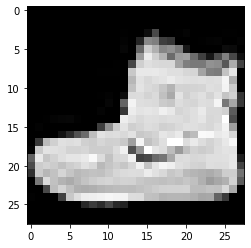

In [32]:
digit = train_data[0]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [33]:
np.set_printoptions(linewidth = 150)
print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

## 3. Data Preprocessing
- reshape & normalization

In [34]:
train_data = train_data.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

train_data.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

- Normalization

In [35]:
train_data = train_data.astype(float) / 255
X_test = X_test.astype(float) / 255

- One Hot Encoding

In [36]:
train_targets = to_categorical(train_targets)
y_test = to_categorical(y_test)

- Train & Validation Split

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## 3. Modeling

### 1) Define

(1) Case1

In [71]:
mnist_1 = models.Sequential()

mnist_1.add(layers.Conv2D(filters = 128, kernel_size = (3, 3),
                          activation = 'relu', input_shape = (28, 28, 1)))
mnist_1.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
mnist_1.add(layers.MaxPool2D(pool_size = (2, 2)))
mnist_1.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
mnist_1.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
mnist_1.add(layers.MaxPool2D(pool_size = (2, 2)))
mnist_1.add(layers.Flatten())
mnist_1.add(layers.Dense(64, activation = 'relu'))
mnist_1.add(layers.Dense(10, activation = 'softmax'))

In [72]:
mnist_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)             

In [73]:
K.clear_session()

### 2) Compile

In [74]:
mnist_1.compile(loss = 'categorical_crossentropy' ,
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

### 4) Fit 

In [75]:
%%time

Hist_mnist_1 = mnist_1.fit(X_train, y_train,
                           epochs = 50,
                           batch_size = 128,
                           validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 [==============================] - 7s 16ms/step - loss: 1.0064 - accuracy: 0.6442 - val_loss: 0.4068 - val_accuracy: 0.8484
Epoch 2/50
375/375 [==============================] - 6s 15ms/step - loss: 0.3633 - accuracy: 0.8688 - val_loss: 0.2964 - val_accuracy: 0.8911
Epoch 3/50
375/375 [==============================] - 6s 15ms/step - loss: 0.2852 - accuracy: 0.8955 - val_loss: 0.2832 - val_accuracy: 0.8953
Epoch 4/50
375/375 [==============================] - 6s 15ms/step - loss: 0.2459 - accuracy: 0.9087 - val_loss: 0.2532 - val_accuracy: 0.9053
Epoch 5/50
375/375 [==============================] - 6s 15ms/step - loss: 0.2168 - accuracy: 0.9205 - val_loss: 0.2501 - val_accuracy: 0.9087
Epoch 6/50
375/375 [==============================] - 6s 15ms/step - loss: 0.1925 - accuracy: 0.9302 - val_loss: 0.2383 - val_accuracy: 0.9133
Epoch 7/50
375/375 [==============================] - 6s 16ms/step - loss: 0.1754 - accuracy: 0.9356 - val_loss: 0.2294 - val_accuracy: 0.9182

### 5) Visualization

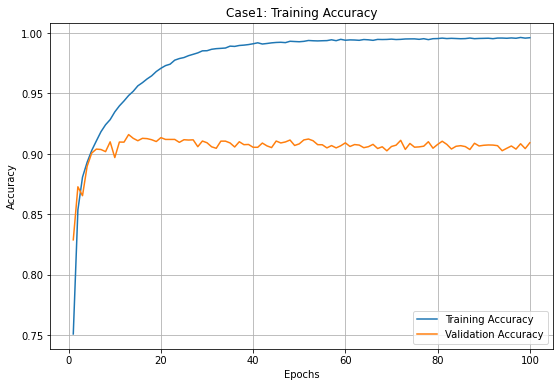

In [43]:
epochs = range(1, len(Hist_mnist_1.history['accuracy']) + 1)



plt.figure(figsize = (9, 6))


plt.plot(epochs, Hist_mnist_1.history['accuracy'])
plt.plot(epochs, Hist_mnist_1.history['val_accuracy'])
plt.title('Case1: Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()
plt.show()

In [24]:
Hist_mnist_1.history.keys()

dict_keys(['loss', 'accuracy'])

### 6) Evaluate

In [44]:
loss, accuracy = mnist_1.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 1.4581 - accuracy: 0.9044
Loss:  1.45812
Accuracy:  0.90440


In [49]:
loss, accuracy = mnist_1.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 1.0333 - accuracy: 0.9044
Loss:  1.03333
Accuracy:  0.90440


In [60]:
loss, accuracy = mnist_1.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.9496 - accuracy: 0.9116
Loss:  0.94958
Accuracy:  0.91160


In [76]:
loss, accuracy = mnist_1.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss))
print('Accuracy: {: .5f}' .format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.9489 - accuracy: 0.9156
Loss:  0.94887
Accuracy:  0.91560
